In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPool2D
import os
import seaborn as sns

Untuk selebihnya mengenai dataset secara struktur file, dll. Bisa dilihat disini :

https://drive.google.com/drive/folders/1OLw5xkjv2jBOK1kbtMepFhiIUfdlSkDe?usp=sharing


In [3]:
#Mount Drive untuk Load Dataset
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#Cek folder sudah benar setelah di mount
print(os.listdir("smic-hs/train-test-split"))
SIZE = 128

['negative', 'positive', 'surprise']


In [5]:
#Deklarasi Array Kosong untuk diisi dengan dataset
images = []
labels = [] 

In [6]:
#Pengisian Array kosong yang tadi
n_positive=0
n_negative=0
n_surprise=0
for directory_path in glob.glob("smic-hs/train-test-split/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.bmp")):
        if label=='positive':
            n_positive+=1
        elif label=='negative':
            n_negative+=1
        elif label=='surprise':
            n_surprise+=1
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)

print(f'\nJumlah keselurahan gambar : {len(images)}')
print(f'Jumlah gambar dengan class negative : {n_negative}')
print(f'Jumlah gambar dengan class positive : {n_positive}')
print(f'Jumlah gambar dengan class surprise : {n_surprise}')

negative
positive
surprise

Jumlah keselurahan gambar : 5514
Jumlah gambar dengan class negative : 2234
Jumlah gambar dengan class positive : 2109
Jumlah gambar dengan class surprise : 1171


In [7]:
#Mengubah array dengan nilai numpy
images = np.array(images)
labels = np.array(labels)

In [8]:
#Randomize dataset
permutation = np.random.permutation(len(images))
images = images[permutation]
labels = labels[permutation]

In [9]:
#split the data
split50 = int(0.5*len(images))
split55 = int(0.55*len(images))
split60 = int(0.60*len(images))
split65 = int(0.65*len(images))
split70 = int(0.7*len(images))
split75 = int(0.75*len(images))
split80 = int(0.8*len(images))
split85 = int(0.85*len(images))
split90 = int(0.9*len(images))

#split with 50% train and 50% test
train_image_split50 = images[:split50]
test_image_split50 = images[split50:]
train_labels_split50 = labels[:split50]
test_labels_split50 = labels[split50:]
#split with 55% train and 45% test
train_image_split55 = images[:split55]
test_image_split55 = images[split55:]
train_labels_split55 = labels[:split55]
test_labels_split55 = labels[split55:]
#split with 60% train and 40% test
train_image_split60 = images[:split60]
test_image_split60 = images[split60:]
train_labels_split60 = labels[:split60]
test_labels_split60 = labels[split60:]
#split with 65% train and 35% test
train_image_split65 = images[:split65]
test_image_split65 = images[split65:]
train_labels_split65 = labels[:split65]
test_labels_split65 = labels[split65:]
#split with 70% train and 30% test
train_image_split70 = images[:split70]
test_image_split70 = images[split70:]
train_labels_split70 = labels[:split70]
test_labels_split70 = labels[split70:]
#split with 75% train and 25% test
train_image_split75 = images[:split75]
test_image_split75 = images[split75:]
train_labels_split75 = labels[:split75]
test_labels_split75 = labels[split75:]
#split with 80% train and 20% test
train_image_split80 = images[:split80]
test_image_split80 = images[split80:]
train_labels_split80 = labels[:split80]
test_labels_split80 = labels[split80:]
#split with 85% train and 15% test
train_image_split85 = images[:split85]
test_image_split85 = images[split85:]
train_labels_split85 = labels[:split85]
test_labels_split85 = labels[split85:]
##split with 90% train and 10% test
train_image_split90 = images[:split90]
test_image_split90 = images[split90:]
train_labels_split90 = labels[:split90]
test_labels_split90 = labels[split90:]

print(f'Jumlah gambar latih 50% adalah {len(train_image_split50)} dan gambar test 50% adalah {len(test_image_split50)}')
print(f'Jumlah gambar latih 55% adalah {len(train_image_split55)} dan gambar test 45% adalah {len(test_image_split55)}')
print(f'Jumlah gambar latih 60% adalah {len(train_image_split60)} dan gambar test 40% adalah {len(test_image_split60)}')
print(f'Jumlah gambar latih 65% adalah {len(train_image_split65)} dan gambar test 35% adalah {len(test_image_split65)}')
print(f'Jumlah gambar latih 70% adalah {len(train_image_split70)} dan gambar test 30% adalah {len(test_image_split70)}')
print(f'Jumlah gambar latih 75% adalah {len(train_image_split75)} dan gambar test 25% adalah {len(test_image_split75)}')
print(f'Jumlah gambar latih 80% adalah {len(train_image_split80)} dan gambar test 20% adalah {len(test_image_split80)}')
print(f'Jumlah gambar latih 85% adalah {len(train_image_split85)} dan gambar test 15% adalah {len(test_image_split85)}')
print(f'Jumlah gambar latih 90% adalah {len(train_image_split90)} dan gambar test 10% adalah {len(test_image_split90)}')

Jumlah gambar latih 50% adalah 2757 dan gambar test 50% adalah 2757
Jumlah gambar latih 55% adalah 3032 dan gambar test 45% adalah 2482
Jumlah gambar latih 60% adalah 3308 dan gambar test 40% adalah 2206
Jumlah gambar latih 65% adalah 3584 dan gambar test 35% adalah 1930
Jumlah gambar latih 70% adalah 3859 dan gambar test 30% adalah 1655
Jumlah gambar latih 75% adalah 4135 dan gambar test 25% adalah 1379
Jumlah gambar latih 80% adalah 4411 dan gambar test 20% adalah 1103
Jumlah gambar latih 85% adalah 4686 dan gambar test 15% adalah 828
Jumlah gambar latih 90% adalah 4962 dan gambar test 10% adalah 552


In [10]:
#Menggunakan label encoder untuk pemberian label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels_split50)
test_labels_encoded50 = le.transform(test_labels_split50)
le.fit(train_labels_split50)
train_labels_encoded50 = le.transform(train_labels_split50)

le.fit(test_labels_split55)
test_labels_encoded55 = le.transform(test_labels_split55)
le.fit(train_labels_split55)
train_labels_encoded55 = le.transform(train_labels_split55)

le.fit(test_labels_split60)
test_labels_encoded60 = le.transform(test_labels_split60)
le.fit(train_labels_split60)
train_labels_encoded60 = le.transform(train_labels_split60)

le.fit(test_labels_split65)
test_labels_encoded65 = le.transform(test_labels_split65)
le.fit(train_labels_split65)
train_labels_encoded65 = le.transform(train_labels_split65)

le.fit(test_labels_split70)
test_labels_encoded70 = le.transform(test_labels_split70)
le.fit(train_labels_split70)
train_labels_encoded70 = le.transform(train_labels_split70)

le.fit(test_labels_split75)
test_labels_encoded75 = le.transform(test_labels_split75)
le.fit(train_labels_split75)
train_labels_encoded75 = le.transform(train_labels_split75)

le.fit(test_labels_split80)
test_labels_encoded80 = le.transform(test_labels_split80)
le.fit(train_labels_split80)
train_labels_encoded80 = le.transform(train_labels_split80)

le.fit(test_labels_split85)
test_labels_encoded85 = le.transform(test_labels_split85)
le.fit(train_labels_split85)
train_labels_encoded85 = le.transform(train_labels_split85)

le.fit(test_labels_split90)
test_labels_encoded90 = le.transform(test_labels_split90)
le.fit(train_labels_split90)
train_labels_encoded90 = le.transform(train_labels_split90)

#Split data
x_train50, y_train50, x_test50, y_test50 = train_image_split50, train_labels_encoded50, test_image_split50, test_labels_encoded50
x_train55, y_train55, x_test55, y_test55 = train_image_split55, train_labels_encoded55, test_image_split55, test_labels_encoded55
x_train60, y_train60, x_test60, y_test60 = train_image_split60, train_labels_encoded60, test_image_split60, test_labels_encoded60
x_train65, y_train65, x_test65, y_test65 = train_image_split65, train_labels_encoded65, test_image_split65, test_labels_encoded65
x_train70, y_train70, x_test70, y_test70 = train_image_split70, train_labels_encoded70, test_image_split70, test_labels_encoded70
x_train75, y_train75, x_test75, y_test75 = train_image_split75, train_labels_encoded75, test_image_split75, test_labels_encoded75
x_train80, y_train80, x_test80, y_test80 = train_image_split80, train_labels_encoded80, test_image_split80, test_labels_encoded80
x_train85, y_train85, x_test85, y_test85 = train_image_split85, train_labels_encoded85, test_image_split85, test_labels_encoded85
x_train90, y_train90, x_test90, y_test90 = train_image_split90, train_labels_encoded90, test_image_split90, test_labels_encoded90

In [11]:
x_train50, x_test50 = x_train50 / 255.0, x_test50 / 255.0

In [12]:
x_train55, x_test55 = x_train55 / 255.0, x_test55 / 255.0

In [13]:
x_train60, x_test60 = x_train60 / 255.0, x_test60 / 255.0

In [14]:
x_train65, x_test65 = x_train65 / 255.0, x_test65 / 255.0

In [15]:
x_train70, x_test70 = x_train70 / 255.0, x_test70 / 255.0

In [16]:
# Normalisasi Pixel
x_train75, x_test75 = x_train75 / 255.0, x_test75 / 255.0

In [17]:
x_train80, x_test80 = x_train80 / 255.0, x_test80 / 255.0

In [18]:
x_train85, x_test85 = x_train85 / 255.0, x_test85 / 255.0

In [19]:
x_train90, x_test90 = x_train90 / 255.0, x_test90 / 255.0

In [20]:
feature_extractor = Sequential()
feature_extractor.add(Conv2D(input_shape=(SIZE,SIZE,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
feature_extractor.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
feature_extractor.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
feature_extractor.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
feature_extractor.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
feature_extractor.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
feature_extractor.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
feature_extractor.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
feature_extractor.add(Flatten())

feature_extractor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       2

In [21]:
X_for_RF50 = feature_extractor.predict(x_train50)

In [22]:
X_for_RF55 = feature_extractor.predict(x_train55)

In [23]:
X_for_RF60 = feature_extractor.predict(x_train60)

In [24]:
X_for_RF65 = feature_extractor.predict(x_train65)

In [25]:
X_for_RF70 = feature_extractor.predict(x_train70)

In [26]:
#Input untuk random forest/Ekstraksi Fitur
X_for_RF75 = feature_extractor.predict(x_train75)

In [27]:
X_for_RF80 = feature_extractor.predict(x_train80)

In [28]:
X_for_RF85 = feature_extractor.predict(x_train85)

In [29]:
X_for_RF90 = feature_extractor.predict(x_train90)

In [30]:
X_test_feature50 = feature_extractor.predict(x_test50)

In [31]:
X_test_feature55 = feature_extractor.predict(x_test55)

In [32]:
X_test_feature60 = feature_extractor.predict(x_test60)

In [33]:
X_test_feature65 = feature_extractor.predict(x_test65)

In [34]:
X_test_feature70 = feature_extractor.predict(x_test70)

In [35]:
X_test_feature = feature_extractor.predict(x_test75)

In [36]:
X_test_feature80 = feature_extractor.predict(x_test80)

In [37]:
X_test_feature85 = feature_extractor.predict(x_test85)

In [38]:
X_test_feature90 = feature_extractor.predict(x_test90)

# **Random Forest**

In [39]:
#Membuat Model Random Forest
from sklearn.ensemble import RandomForestClassifier

In [40]:
#Train data random forest
RF_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
RF_model.fit(X_for_RF50, y_train50) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=10, random_state=42)

In [41]:
#Prediksi dengan model random forest 
prediction_RF50 = RF_model.predict(X_test_feature50)
#Mengembalikan label yang sudah kita encode tadi 
prediction_RF50 = le.inverse_transform(prediction_RF50)

In [42]:
#Akurasi 50% split
from sklearn.metrics import accuracy_score
print (f'Accuracy =  {accuracy_score(test_labels_split50, prediction_RF50)*100}%')

Accuracy =  99.16575988393181%


In [43]:
#Laporan Klasifikasi 50%
from sklearn.metrics import classification_report
print(classification_report(test_labels_split50, prediction_RF50))

              precision    recall  f1-score   support

    negative       0.99      1.00      0.99      1107
    positive       0.99      0.99      0.99      1054
    surprise       1.00      0.98      0.99       596

    accuracy                           0.99      2757
   macro avg       0.99      0.99      0.99      2757
weighted avg       0.99      0.99      0.99      2757



<AxesSubplot:>

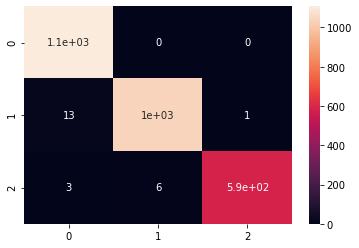

In [44]:
#Confusion Matrix 50%
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_split50, prediction_RF50)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['negative']
The actual label for this image is:  negative


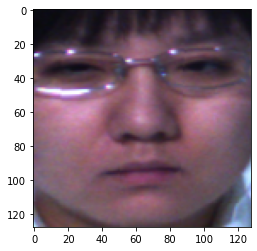

In [45]:
#Testing 50%
n=100 #Pilih sesuai keinginan. n merupakan gambar ke-n.
img50 = x_test50[n]
plt.imshow(img50)
input_img50 = np.expand_dims(img50, axis=0)
input_img_features50=feature_extractor.predict(input_img50)
prediction_RF50 = RF_model.predict(input_img_features50)[0] 
prediction_RF50 = le.inverse_transform([prediction_RF50])
print("The prediction for this image is: ", prediction_RF50)
print("The actual label for this image is: ", test_labels_split50[n])

In [46]:
RF_model.fit(X_for_RF55, y_train55)

RandomForestClassifier(n_estimators=10, random_state=42)

In [47]:
#Prediksi dengan model random forest 
prediction_RF55 = RF_model.predict(X_test_feature55)
#Mengembalikan label yang sudah kita encode tadi 
prediction_RF55 = le.inverse_transform(prediction_RF55)

In [48]:
#Akurasi 55% split
from sklearn.metrics import accuracy_score
print (f'Accuracy =  {accuracy_score(test_labels_split55, prediction_RF55)*100}%')

Accuracy =  99.23448831587429%


In [49]:
#Laporan Klasifikasi 55%
from sklearn.metrics import classification_report
print(classification_report(test_labels_split55, prediction_RF55))

              precision    recall  f1-score   support

    negative       0.99      1.00      0.99       999
    positive       0.99      0.99      0.99       947
    surprise       1.00      0.99      0.99       536

    accuracy                           0.99      2482
   macro avg       0.99      0.99      0.99      2482
weighted avg       0.99      0.99      0.99      2482



<AxesSubplot:>

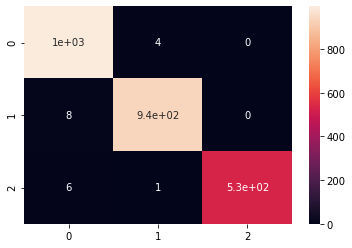

In [50]:
#Confusion Matrix 55%
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_split55, prediction_RF55)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['negative']
The actual label for this image is:  negative


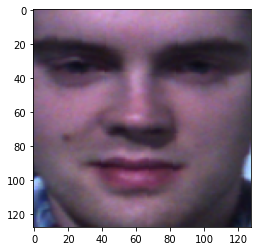

In [51]:
#Testing 55%
n=100 #Pilih sesuai keinginan. n merupakan gambar ke-n.
img55 = x_test55[n]
plt.imshow(img55)
input_img55 = np.expand_dims(img55, axis=0)
input_img_features55=feature_extractor.predict(input_img55)
prediction_RF55 = RF_model.predict(input_img_features55)[0] 
prediction_RF55 = le.inverse_transform([prediction_RF55])
print("The prediction for this image is: ", prediction_RF55)
print("The actual label for this image is: ", test_labels_split55[n])

In [52]:
RF_model.fit(X_for_RF60, y_train60)

RandomForestClassifier(n_estimators=10, random_state=42)

In [53]:
#Prediksi dengan model random forest 
prediction_RF60 = RF_model.predict(X_test_feature60)
#Mengembalikan label yang sudah kita encode tadi 
prediction_RF60 = le.inverse_transform(prediction_RF60)

In [54]:
#Akurasi 60% split
from sklearn.metrics import accuracy_score
print (f'Accuracy =  {accuracy_score(test_labels_split60, prediction_RF60)*100}%')

Accuracy =  99.27470534904805%


In [55]:
#Laporan Klasifikasi 60%
from sklearn.metrics import classification_report
print(classification_report(test_labels_split60, prediction_RF60))

              precision    recall  f1-score   support

    negative       0.98      1.00      0.99       892
    positive       1.00      0.99      0.99       835
    surprise       1.00      0.99      0.99       479

    accuracy                           0.99      2206
   macro avg       0.99      0.99      0.99      2206
weighted avg       0.99      0.99      0.99      2206



<AxesSubplot:>

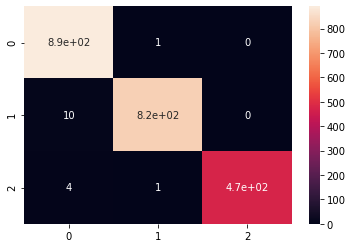

In [56]:
#Confusion Matrix 60%
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_split60, prediction_RF60)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['positive']
The actual label for this image is:  positive


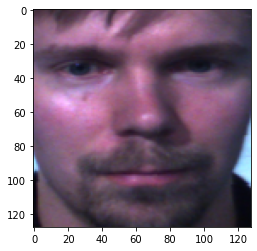

In [57]:
#Testing 60%
n=100 #Pilih sesuai keinginan. n merupakan gambar ke-n.
img60 = x_test60[n]
plt.imshow(img60)
input_img60 = np.expand_dims(img60, axis=0)
input_img_features60=feature_extractor.predict(input_img60)
prediction_RF60 = RF_model.predict(input_img_features60)[0] 
prediction_RF60 = le.inverse_transform([prediction_RF60])
print("The prediction for this image is: ", prediction_RF60)
print("The actual label for this image is: ", test_labels_split60[n])

In [58]:
RF_model.fit(X_for_RF65, y_train65)

RandomForestClassifier(n_estimators=10, random_state=42)

In [59]:
#Prediksi dengan model random forest 
prediction_RF65 = RF_model.predict(X_test_feature65)
#Mengembalikan label yang sudah kita encode tadi 
prediction_RF65 = le.inverse_transform(prediction_RF65)

In [60]:
#Akurasi 65% split
from sklearn.metrics import accuracy_score
print (f'Accuracy =  {accuracy_score(test_labels_split65, prediction_RF65)*100}%')

Accuracy =  99.06735751295336%


In [61]:
#Laporan Klasifikasi 65%
from sklearn.metrics import classification_report
print(classification_report(test_labels_split65, prediction_RF65))

              precision    recall  f1-score   support

    negative       0.99      1.00      0.99       788
    positive       0.99      0.99      0.99       731
    surprise       1.00      0.98      0.99       411

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



<AxesSubplot:>

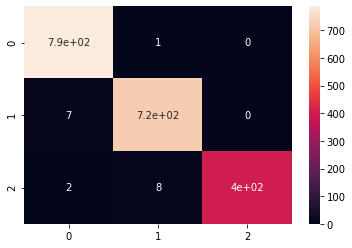

In [62]:
#Confusion Matrix 65%
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_split65, prediction_RF65)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['positive']
The actual label for this image is:  positive


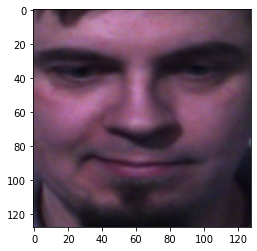

In [63]:
#Testing 65%
n=100 #Pilih sesuai keinginan. n merupakan gambar ke-n.
img65 = x_test65[n]
plt.imshow(img65)
input_img65 = np.expand_dims(img65, axis=0)
input_img_features65=feature_extractor.predict(input_img65)
prediction_RF65 = RF_model.predict(input_img_features65)[0] 
prediction_RF65 = le.inverse_transform([prediction_RF65])
print("The prediction for this image is: ", prediction_RF65)
print("The actual label for this image is: ", test_labels_split65[n])

In [64]:
RF_model.fit(X_for_RF70, y_train70)

RandomForestClassifier(n_estimators=10, random_state=42)

In [65]:
#Prediksi dengan model random forest 
prediction_RF70 = RF_model.predict(X_test_feature70)
#Mengembalikan label yang sudah kita encode tadi 
prediction_RF70 = le.inverse_transform(prediction_RF70)

In [66]:
#Akurasi 70% split
from sklearn.metrics import accuracy_score
print (f'Accuracy =  {accuracy_score(test_labels_split70, prediction_RF70)*100}%')

Accuracy =  99.75830815709969%


In [67]:
#Laporan Klasifikasi 70%
from sklearn.metrics import classification_report
print(classification_report(test_labels_split70, prediction_RF70))

              precision    recall  f1-score   support

    negative       0.99      1.00      1.00       672
    positive       1.00      0.99      1.00       619
    surprise       1.00      1.00      1.00       364

    accuracy                           1.00      1655
   macro avg       1.00      1.00      1.00      1655
weighted avg       1.00      1.00      1.00      1655



<AxesSubplot:>

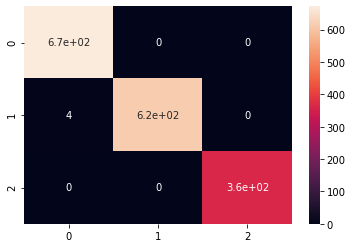

In [68]:
#Confusion Matrix 70%
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_split70, prediction_RF70)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['negative']
The actual label for this image is:  negative


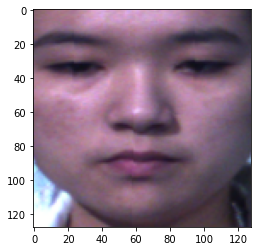

In [69]:
#Testing 70%
n=100 #Pilih sesuai keinginan. n merupakan gambar ke-n.
img70 = x_test70[n]
plt.imshow(img70)
input_img70 = np.expand_dims(img70, axis=0)
input_img_features70=feature_extractor.predict(input_img70)
prediction_RF70 = RF_model.predict(input_img_features70)[0] 
prediction_RF70 = le.inverse_transform([prediction_RF70])
print("The prediction for this image is: ", prediction_RF70)
print("The actual label for this image is: ", test_labels_split70[n])

In [70]:
RF_model.fit(X_for_RF75, y_train75)

RandomForestClassifier(n_estimators=10, random_state=42)

In [71]:
#Prediksi dengan model random forest 
prediction_RF = RF_model.predict(X_test_feature)
#Mengembalikan label yang sudah kita encode tadi 
prediction_RF = le.inverse_transform(prediction_RF)

In [72]:
#Akurasi 75% split
from sklearn.metrics import accuracy_score
print (f'Accuracy =  {accuracy_score(test_labels_split75, prediction_RF)*100}%')

Accuracy =  99.27483683828862%


In [73]:
#Laporan Klasifikasi 75%
from sklearn.metrics import classification_report
print(classification_report(test_labels_split75, prediction_RF))

              precision    recall  f1-score   support

    negative       0.99      1.00      0.99       560
    positive       0.99      0.99      0.99       525
    surprise       1.00      0.98      0.99       294

    accuracy                           0.99      1379
   macro avg       0.99      0.99      0.99      1379
weighted avg       0.99      0.99      0.99      1379



<AxesSubplot:>

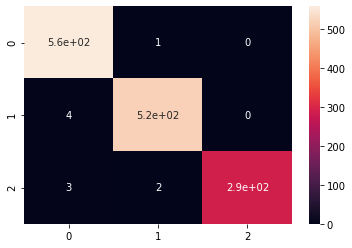

In [74]:
#Confusion Matrix 75%
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_split75, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['negative']
The actual label for this image is:  negative


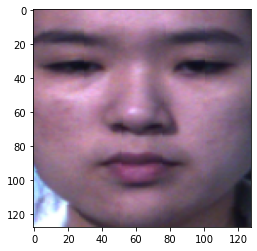

In [75]:
#Testing 75%
n=100 #Pilih sesuai keinginan. n merupakan gambar ke-n.
img = x_test75[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels_split75[n])

In [76]:
RF_model.fit(X_for_RF80, y_train80)

RandomForestClassifier(n_estimators=10, random_state=42)

In [77]:
#Prediksi dengan model random forest 
prediction_RF80 = RF_model.predict(X_test_feature80)
#Mengembalikan label yang sudah kita encode tadi 
prediction_RF80 = le.inverse_transform(prediction_RF80)

In [78]:
#Akurasi 80% split
from sklearn.metrics import accuracy_score
print (f'Accuracy =  {accuracy_score(test_labels_split80, prediction_RF80)*100}%')

Accuracy =  99.63735267452402%


In [79]:
#Laporan Klasifikasi 80%
from sklearn.metrics import classification_report
print(classification_report(test_labels_split80, prediction_RF80))

              precision    recall  f1-score   support

    negative       1.00      0.99      1.00       456
    positive       1.00      1.00      1.00       410
    surprise       1.00      1.00      1.00       237

    accuracy                           1.00      1103
   macro avg       1.00      1.00      1.00      1103
weighted avg       1.00      1.00      1.00      1103



<AxesSubplot:>

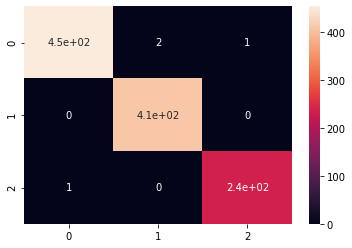

In [80]:
#Confusion Matrix 80%
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_split80, prediction_RF80)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['negative']
The actual label for this image is:  negative


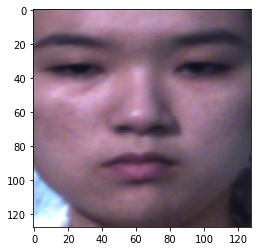

In [81]:
#Testing 80%
n=100 #Pilih sesuai keinginan. n merupakan gambar ke-n.
img80 = x_test80[n]
plt.imshow(img80)
input_img80 = np.expand_dims(img80, axis=0)
input_img_features80=feature_extractor.predict(input_img80)
prediction_RF80 = RF_model.predict(input_img_features80)[0] 
prediction_RF80 = le.inverse_transform([prediction_RF80])
print("The prediction for this image is: ", prediction_RF80)
print("The actual label for this image is: ", test_labels_split80[n])

In [82]:
RF_model.fit(X_for_RF85, y_train85)

RandomForestClassifier(n_estimators=10, random_state=42)

In [83]:
#Prediksi dengan model random forest 
prediction_RF85 = RF_model.predict(X_test_feature85)
#Mengembalikan label yang sudah kita encode tadi 
prediction_RF85 = le.inverse_transform(prediction_RF85)

In [84]:
#Akurasi 85% split
from sklearn.metrics import accuracy_score
print (f'Accuracy =  {accuracy_score(test_labels_split85, prediction_RF85)*100}%')

Accuracy =  99.51690821256038%


In [85]:
#Laporan Klasifikasi 85%
from sklearn.metrics import classification_report
print(classification_report(test_labels_split85, prediction_RF85))

              precision    recall  f1-score   support

    negative       0.99      0.99      0.99       334
    positive       0.99      0.99      0.99       312
    surprise       1.00      1.00      1.00       182

    accuracy                           1.00       828
   macro avg       1.00      1.00      1.00       828
weighted avg       1.00      1.00      1.00       828



<AxesSubplot:>

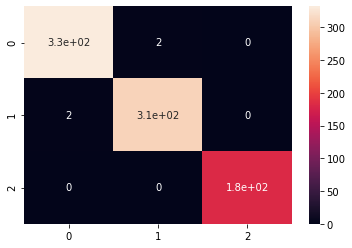

In [86]:
#Confusion Matrix 85%
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_split85, prediction_RF85)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['negative']
The actual label for this image is:  negative


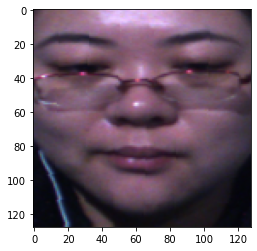

In [87]:
#Testing 85%
n=10 #Pilih sesuai keinginan. n merupakan gambar ke-n.
img85 = x_test85[n]
plt.imshow(img85)
input_img85 = np.expand_dims(img85, axis=0)
input_img_features85=feature_extractor.predict(input_img85)
prediction_RF85 = RF_model.predict(input_img_features85)[0] 
prediction_RF85 = le.inverse_transform([prediction_RF85])
print("The prediction for this image is: ", prediction_RF85)
print("The actual label for this image is: ", test_labels_split85[n])

In [88]:
RF_model.fit(X_for_RF90, y_train90)

RandomForestClassifier(n_estimators=10, random_state=42)

In [89]:
#Prediksi dengan model random forest 
prediction_RF90 = RF_model.predict(X_test_feature90)
#Mengembalikan label yang sudah kita encode tadi 
prediction_RF90 = le.inverse_transform(prediction_RF90)

In [90]:
#Akurasi 90% split
from sklearn.metrics import accuracy_score
print (f'Accuracy =  {accuracy_score(test_labels_split90, prediction_RF90)*100}%')

Accuracy =  99.63768115942028%


In [91]:
#Laporan Klasifikasi 90%
from sklearn.metrics import classification_report
print(classification_report(test_labels_split90, prediction_RF90))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       221
    positive       1.00      1.00      1.00       212
    surprise       1.00      0.99      1.00       119

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552



<AxesSubplot:>

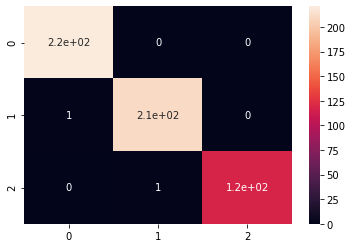

In [92]:
#Confusion Matrix 90%
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_split90, prediction_RF90)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['surprise']
The actual label for this image is:  surprise


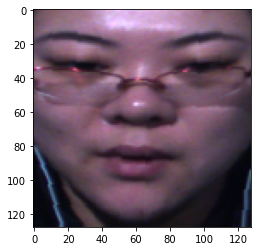

In [93]:
#Testing 90%
n=10 #Pilih sesuai keinginan. n merupakan gambar ke-n.
img90 = x_test90[n]
plt.imshow(img90)
input_img90 = np.expand_dims(img90, axis=0)
input_img_features90=feature_extractor.predict(input_img90)
prediction_RF90 = RF_model.predict(input_img_features90)[0] 
prediction_RF90 = le.inverse_transform([prediction_RF90])
print("The prediction for this image is: ", prediction_RF90)
print("The actual label for this image is: ", test_labels_split90[n])

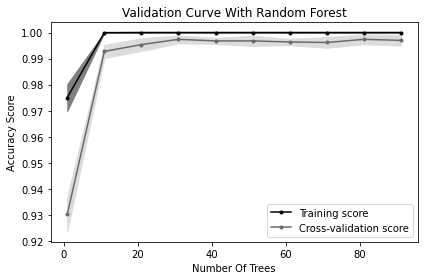

In [101]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_for_RF90, 
                                             y_train90, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, '.-', label="Training score", color="black")
plt.plot(param_range, test_mean, '.-', label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()